<a href="https://colab.research.google.com/github/aryamanpathak2022/IAT_DASS_PAPER/blob/main/dass_to_iat_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load the dataset
file_path = './drive/MyDrive/NIMHANS/pp_output.csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

In [ ]:
# Define features and target
X = data[['Depression_Class', 'Anxiety_Class', 'Stress_Class']]
y = data['iat_score']

In [ ]:
from sklearn.utils import resample

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

Index(['Depression_Class', 'Anxiety_Class', 'Stress_Class'], dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
# Define XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Apply grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Test Set Accuracy: 83.33%


In [ ]:
# Define AdaBoost model
base_estimator = DecisionTreeClassifier(random_state=42)  # Base estimator for AdaBoost
model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3]  # Note the updated parameter name
}

# Apply grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best Parameters: {'estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 150}
Test Set Accuracy: 83.33%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define Random Forest model
model = RandomForestClassifier(random_state=42)

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [5, 10, 20, None],      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required in each leaf
    'max_features': ['sqrt', 'log2'],    # Number of features to consider at each split
    'bootstrap': [True, False]           # Whether to use bootstrapping
}

# Apply grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Set Accuracy: 83.45%


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

l2_lambda = 0.01  # You can tune this value

model1 = Sequential([
  Dense(64, activation='relu', kernel_regularizer=l2(l2_lambda), input_shape=(X_train.shape[1],)),
  Dense(32, activation='relu', kernel_regularizer=l2(l2_lambda)),
  Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']
)


In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)

Depression_Class    int64
Anxiety_Class       int64
Stress_Class        int64
dtype: object
int64


In [ ]:
history = model1.fit(
    X_train, y_train,
    epochs=500,           # Number of epochs
    batch_size=64,       # Batch size
    validation_split=0.2, # Use 20% of training data for validation
    # callbacks=[early_stopping]
)


Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7921 - loss: 1.0194 - val_accuracy: 0.7845 - val_loss: 0.9441
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7876 - loss: 0.9294 - val_accuracy: 0.7845 - val_loss: 0.9103
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8052 - loss: 0.8780 - val_accuracy: 0.7845 - val_loss: 0.8809
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7928 - loss: 0.8571 - val_accuracy: 0.7845 - val_loss: 0.8516
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8051 - loss: 0.8182 - val_accuracy: 0.7845 - val_loss: 0.8262
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7743 - loss: 0.8271 - val_accuracy: 0.7845 - val_loss: 0.8033
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7763 - loss: 0.8067 - val_accuracy: 0.7845 - val_loss: 0.7816
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7952 - loss: 0.7508 - val_accuracy: 0.7845 - val_loss:

In [ ]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.10f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8477 - loss: 0.4088
Test Accuracy: 84.1379284859%


In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model on test data
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.10f}")
print(f"Test Accuracy: {test_accuracy * 100:.10f}%")

# Predict labels
y_pred = model1.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Adjust threshold for classification tasks

# Print classification report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8417 - loss: 0.4145
Test Loss: 0.4090681374
Test Accuracy: 84.1379284859%
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       122
           1       0.50      0.26      0.34        23

    accuracy                           0.84       145
   macro avg       0.69      0.61      0.63       145
weighted avg       0.81      0.84      0.82       145



In [ ]:
# Save the entire model
model1.save("./drive/MyDrive/NIMHANS/nn_model.keras")  # Saves in keras format

In [ ]:
import matplotlib.pyplot as plt

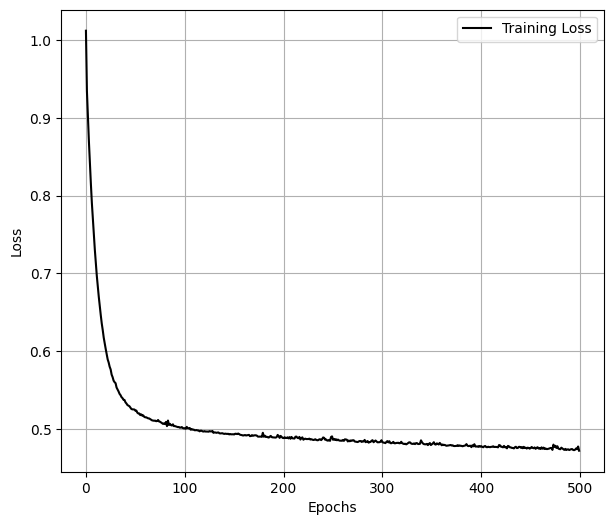

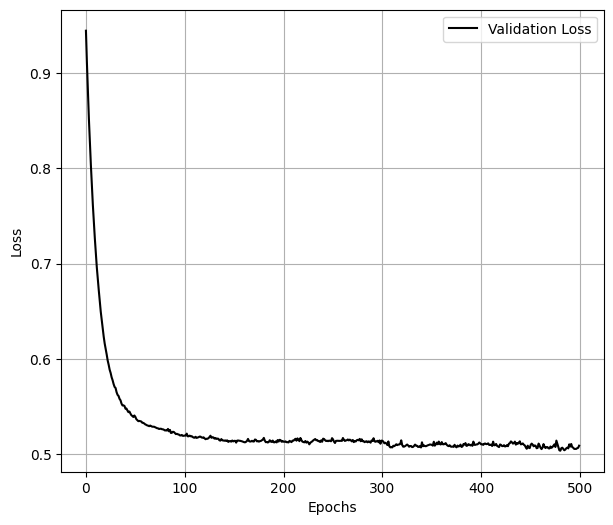

In [45]:
import matplotlib.pyplot as plt

# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training loss in the first window
plt.figure(figsize=(7, 6))
plt.plot(train_loss, label='Training Loss', color='black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)  # Enable grid for the training loss plot
plt.show()  # This will display the first plot

# Plotting the validation loss in the second window
plt.figure(figsize=(7, 6))
plt.plot(val_loss, label='Validation Loss', color='black')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.title('Validation Loss Over Epochs')
plt.legend()
plt.grid(True)  # Enable grid for the validation loss plot
plt.show()  # This will display the second plot

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the KNN model
model = KNeighborsClassifier()

# Define grid of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],           # Number of neighbors to consider
    'weights': ['uniform', 'distance'],   # Weight function for neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Apply grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Test Set Accuracy: 82.76%
